In [1]:
import os
import sys
sys.path.insert(0, '..')

from google.cloud import bigquery
from google.oauth2 import service_account

from google.cloud import bigquery
from google.oauth2 import service_account

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from authenticate_service_account import main
from utils import preprocess


In [2]:
# client = main()

# query = """
# SELECT *
# FROM skyscanner-insights-343713.Itinerary_Scoring.top_10_ods
# """

# query_job = client.query(query)

# results = query_job.result()
# data = results.to_dataframe()

data = pd.read_csv('top_ods.csv')


In [3]:
#data.to_csv('top_ods.csv')
data.columns


Index(['Unnamed: 0', 'OriginApt', 'OriginCty', 'OriginCtry', 'DestinationApt',
       'DestinationCty', 'DestinationCtry', 'TravelHorizonDays',
       'TravelDistanceKm', 'SelfTransfer', 'Stops', 'DurationMin',
       'Seg_0_OriginIATA', 'Seg_0_OriginName', 'Seg_0_DestinationIATA',
       'Seg_0_DestinationName', 'Seg_0_OperatingCarrierIATA',
       'Seg_0_TravelDistanceKm', 'Seg_1_OriginIATA', 'Seg_1_OriginName',
       'Seg_1_DestinationIATA', 'Seg_1_DestinationName',
       'Seg_1_OperatingCarrierIATA', 'Seg_1_TravelDistanceKm',
       'Seg_2_OriginIATA', 'Seg_2_OriginName', 'Seg_2_DestinationIATA',
       'Seg_2_DestinationName', 'Seg_2_OperatingCarrierIATA',
       'Seg_2_TravelDistanceKm', 'Seg_3_OriginIATA', 'Seg_3_OriginName',
       'Seg_3_DestinationIATA', 'Seg_3_DestinationName',
       'Seg_3_OperatingCarrierIATA', 'Seg_3_TravelDistanceKm',
       'Seg_0_DurationMin', 'Seg_1_DurationMin', 'Seg_2_DurationMin',
       'Seg_3_DurationMin', 'passengers', 'SearchLowestRatio',
  

In [4]:
itin = data

itin = preprocess(itin, ['OriginCty', 'DestinationCty'], True)


In [11]:
itin[itin['OD'] == 'LONNYC']


,OD,TravelHorizonDays,TravelDistanceKm,SelfTransfer,Stops,DurationMin,PricePerPax,redirect_ratio,total_travel_time,total_layover_time,total_layover_time_ratio,total_distance_traveled,extra_travel_distance_ratio
19,LONNYC,10,5540,False,0,505,326.0250,0.004274,505.0,0.0,0.000000,5540.0,1.0
20,LONNYC,10,5540,False,0,490,363.6750,0.004274,490.0,0.0,0.000000,5540.0,1.0
21,LONNYC,10,5540,False,0,465,354.8125,0.008547,465.0,0.0,0.000000,5540.0,1.0
22,LONNYC,10,5540,False,0,480,326.1750,0.008547,480.0,0.0,0.000000,5540.0,1.0
23,LONNYC,10,5568,False,0,498,334.6700,0.017094,498.0,0.0,0.000000,5568.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27998,LONNYC,262,5540,False,0,485,449.5600,0.111111,485.0,0.0,0.000000,5540.0,1.0
27999,LONNYC,300,5540,False,0,485,270.7750,0.166667,485.0,0.0,0.000000,5540.0,1.0
28000,LONNYC,300,5568,False,0,480,266.5750,0.166667,480.0,0.0,0.000000,5568.0,1.0
28001,LONNYC,300,5568,False,0,480,209.9100,0.500000,480.0,0.0,0.000000,5568.0,1.0


<Axes: >

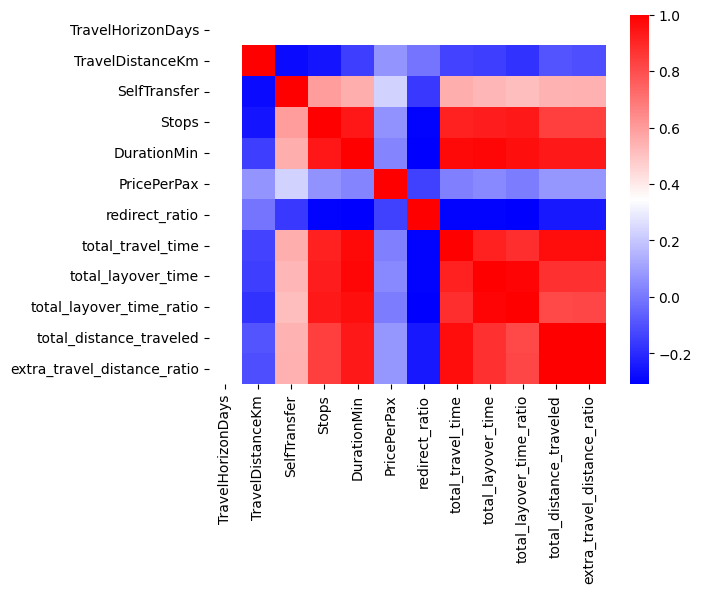

In [17]:
itin = itin[['OD', 'TravelHorizonDays',
       'TravelDistanceKm', 'SelfTransfer', 'Stops', 'DurationMin', 'PricePerPax', 'redirect_ratio', 'total_travel_time', 'total_layover_time', 'total_layover_time_ratio', 'total_distance_traveled', 'extra_travel_distance_ratio']]

corr_matrix = itin[(itin['OD'] == 'LONNYC') & (itin['TravelHorizonDays'] == 10) ].drop(columns=['OD']).corr()
column_names = corr_matrix.columns
sns.heatmap(corr_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr")


In [18]:
# Converting the correlation matrix into a DataFrame
corr_df = corr_matrix.stack().reset_index()

# Renaming the columns
corr_df.columns = ['feature_1','feature_2', 'correlation']

# Remove "self correlations"
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]

# Computing the absolute correlation
corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])

# Showing the top 5 most correlated pairs of feature
corr_df[corr_df['feature_1'] == 'redirect_ratio'].sort_values(by="absolute_correlation", ascending=False)


,feature_1,feature_2,correlation,absolute_correlation
63,redirect_ratio,total_layover_time_ratio,-0.309436,0.309436
58,redirect_ratio,DurationMin,-0.306537,0.306537
57,redirect_ratio,Stops,-0.302762,0.302762
61,redirect_ratio,total_travel_time,-0.301143,0.301143
62,redirect_ratio,total_layover_time,-0.299275,0.299275
64,redirect_ratio,total_distance_traveled,-0.247329,0.247329
65,redirect_ratio,extra_travel_distance_ratio,-0.246603,0.246603
56,redirect_ratio,SelfTransfer,-0.165533,0.165533
59,redirect_ratio,PricePerPax,-0.141772,0.141772
55,redirect_ratio,TravelDistanceKm,-0.011432,0.011432


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [36]:
X = itin.drop(['target'], axis=1)
y = itin['target']


In [34]:
import category_encoders as ce

data_cty = data[['OriginCty','DestinationCty']]

# Initialize BinaryEncoder
binary_encoder = ce.BinaryEncoder(cols=['OriginCty'])

# Fit and transform the data
binary_encoded_data = binary_encoder.fit_transform(data_cty)

# Print the result
print("Binary Encoded data:")
print(binary_encoded_data)


Binary Encoded data:
       OriginCty_0  OriginCty_1  OriginCty_2 DestinationCty
0                0            0            1            BOM
1                0            1            0            BKK
2                0            1            0            BKK
3                0            1            0            TPE
4                0            1            0            TPE
...            ...          ...          ...            ...
28164            1            1            1            BKK
28165            1            1            1            BKK
28166            1            1            1            BKK
28167            1            1            1            BKK
28168            1            1            1            BKK

[28169 rows x 4 columns]


In [35]:
data_cty['OriginCty'].unique()


array(['DEL', 'HKG', 'LON', 'SEL', 'TLV', 'TPE', 'TYO'], dtype=object)

In [37]:
X


,TravelHorizonDays,TravelDistanceKm,SelfTransfer,Stops,DurationMin,Seg_0_TravelDistanceKm,Seg_1_TravelDistanceKm,Seg_2_TravelDistanceKm,Seg_3_TravelDistanceKm,Seg_0_DurationMin,Seg_1_DurationMin,Seg_2_DurationMin,Seg_3_DurationMin,passengers,SearchLowestRatio,ItinLowestRatio,Price,PricePerPax
0,180,1140,False,0,135,1140,<NA>,<NA>,<NA>,135.0,NaN,NaN,NaN,15,1.007576,1.003143,172.730000,57.580000
1,279,1689,False,0,175,1689,<NA>,<NA>,<NA>,175.0,NaN,NaN,NaN,8,1.177942,1.044047,184.716250,92.358750
2,279,1689,False,0,195,1689,<NA>,<NA>,<NA>,195.0,NaN,NaN,NaN,2,1.758644,1.040158,275.780000,137.890000
3,136,806,False,0,100,806,<NA>,<NA>,<NA>,100.0,NaN,NaN,NaN,4,1.052870,0.986143,121.290000,121.290000
4,136,806,False,0,115,806,<NA>,<NA>,<NA>,115.0,NaN,NaN,NaN,4,1.055584,1.015382,142.770000,106.105000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28164,138,4648,False,0,430,4648,<NA>,<NA>,<NA>,430.0,NaN,NaN,NaN,7,1.720454,1.024236,421.404286,421.404286
28165,138,4648,False,1,780,1257,3668,<NA>,<NA>,150.0,360.0,NaN,NaN,1,1.492128,NaN,375.260000,375.260000
28166,138,4648,False,1,645,1257,3668,<NA>,<NA>,150.0,335.0,NaN,NaN,1,1.640728,1.051490,414.570000,414.570000
28167,340,4648,False,1,650,5357,1416,<NA>,<NA>,430.0,150.0,NaN,NaN,1,1.452649,1.000000,252.725000,252.725000
